In [11]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import seaborn as sn

In [12]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [13]:
X_train = X_train / 255
X_test = X_test / 255

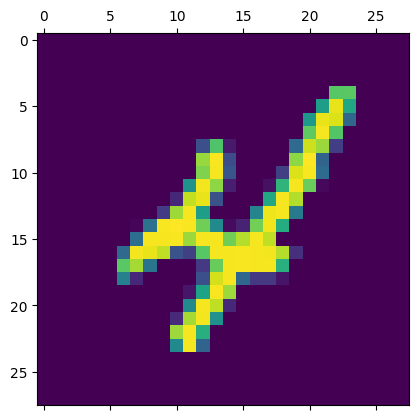

In [14]:
 plt.matshow(X_train[9])

In [15]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)


In [19]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
    
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/ftrl",histogram_freq=1)

model.compile(
    optimizer='ftrl',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,Y_train,epochs=10,callbacks=[tb_callback])


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4835 - accuracy: 0.7795
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0167 - accuracy: 0.8254
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8607 - accuracy: 0.8383
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7747 - accuracy: 0.8463
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7181 - accuracy: 0.8523
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6773 - accuracy: 0.8565
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6461 - accuracy: 0.8603
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6212 - accuracy: 0.8632
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6007 - accuracy: 0.8650
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.583

In [42]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3190 - accuracy: 0.9230


[0.31898248195648193, 0.9229999780654907]

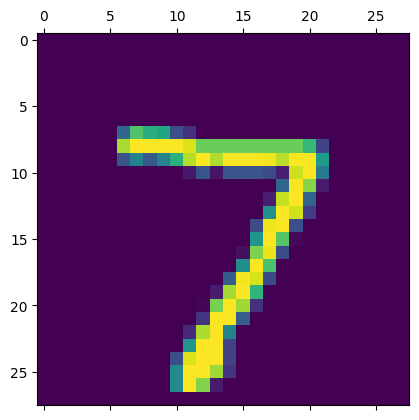

In [43]:
plt.matshow(X_test[0])


In [47]:
Y_predict = model.predict(X_test_flattened)
Y_predicted_labels = [np.argmax(i) for i in Y_predict]
Y_predict[0]

313/313 [==============================] - 0s 1ms/step


array([6.0073549e-14, 3.3088993e-18, 5.2923746e-12, 4.7297612e-01,
       3.0940826e-06, 4.0238118e-03, 1.8328313e-22, 9.9848503e-01,
       1.5279396e-03, 4.5420274e-02], dtype=float32)

In [48]:

np.argmax(Y_predict[0])

7

In [53]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=Y_predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

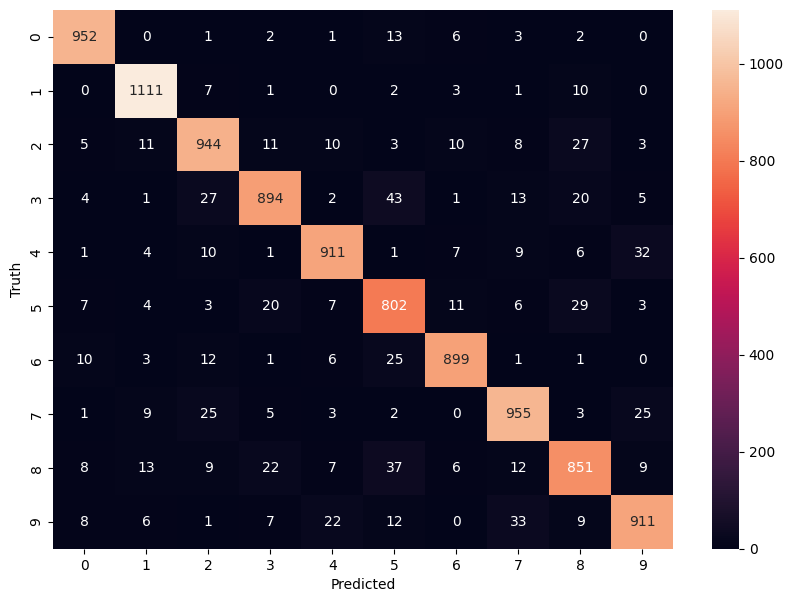

In [54]:
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')